# 012.c_Sales_Outlets_Performance_Assessment

<a id='back'><a/>
# Table of Contents
    
- [1. Sales Outlets Performance Assessment Overview](#1)
- [2. General Information Overview](#2)
    - [2.1 Retail Dataset](#2.1)
    - [2.2 Product Code Dataset](#2.2)
- [3. Data Preprocessing](#3)
    - [3.1 Retail Dataset](#3.1)
        - [3.1.1 Dropping or Filling in Values](#3.1.1)
        - [3.1.2 Changing Data Types](#3.1.2)
        - [3.1.3 Duplicates](#3.1.3)
        - [3.1.4 Renaming Columns](#3.1.4)
    - [3.2 Product Code Dataset](#2.2)
        - [3.2.1 Renaming Columns](#3.2.1)
    - [3.3 File Consolidation](#3.3)
- [4. Exploratory Data Analysis](#4)
    - [4.1 Store Performance](#4.1)
        - [4.1.1 Store Revenues](#4.1.1)
        - [4.1.2 Store Unit Sales](#4.1.2)
        - [4.1.3 Revenue and Unit Sales Distribution](#4.1.3)
    - [4.2 Customer Revenue](#4.2)
    - [4.3 Product Performance](#4.3)
    - [4.4 Sales Over the Time Period](#4.4)
- [5. Hypothesis Testing](#5)
    - [5.1 Test 1](#5.1)
        - [5.1.1 Assumptions Review](#5.1.1)
        - [5.1.2 Hypothesis Test](#5.1.2)
    - [5.2 Test 2](#5.2)
        - [5.2.1 Assumptions Review](#5.2.1)
        - [5.2.2 Hypothesis Test](#5.2.2)
- [6. General Conclusions](#6)

<a id='1'><a/>
# 1 Sales Outlets Performance Assessment Overview
[Return to Table of Contents](#back)

We have been asked to assess the performance of the sales outlets of the building-material retailer chain *Home World*. We have been provided with a dataset that contains data on purchases made over a 3-month period. All of *Home World's* customers have memberships at no cost and can become members of the store's loyalty program for $20 per month. The loyalty program includes discounts, information on special offers, and gifts.

In this document you will find the analysis performed and in the link below a PDF presentation of our findings. Presentation: <https://drive.google.com/file/d/199356ZXwW-O_zcaEUVQVCY1t2M4OYk4N/view?usp=sharing>

<a id='2'><a/>
# 2 General Information Overview
[Return to Table of Contents](#back)

In [1]:
# import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
from scipy import stats as st
from scipy.stats import levene
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
# read all input data

try: # local path
    retail_df= pd.read_csv('retail_dataset_us.csv')
    product_df= pd.read_csv('product_codes_us.csv',';')
except: # server path
    retail_df= pd.read_csv('/datasets/retail_dataset_us.csv')
    product_df= pd.read_csv('/datasets/product_codes_us.csv',';')

<a id='2.1'><a/>
## 2.1 Retail Dataset
[Return to Table of Contents](#back)

In [3]:
retail_df.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [4]:
first_entry = retail_df['purchasedate'].min()
last_entry = retail_df['purchasedate'].max()
print("First entry:",first_entry)
print("Last entry:",last_entry)

First entry: 2016-12-01 08:26:00
Last entry: 2017-02-28 17:04:00


In [5]:
# definitions for later calculations

time_frame_months = 3
loyalty_prog_fee = 20

In [6]:
retail_df.describe()

,Quantity,CustomerID,loyalty_program
count,105335.000000,69125.000000,105335.000000
mean,7.821218,21019.302047,0.226345
std,327.946695,1765.444679,0.418467
min,-74216.000000,18025.000000,0.000000
25%,0.000000,19544.000000,0.000000
50%,2.000000,20990.000000,0.000000
75%,7.000000,22659.000000,0.000000
max,74214.000000,23962.000000,1.000000


There are negative values in "Quantity"

In [7]:
retail_df.corr()

,Quantity,CustomerID,loyalty_program
Quantity,1.000000,-0.003528,0.002953
CustomerID,-0.003528,1.000000,0.833905
loyalty_program,0.002953,0.833905,1.000000


In [7]:
retail_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 29.0 MB


In [8]:
for c in retail_df.select_dtypes(include ='object').columns: 
    print()
    print(c)
    print(retail_df[c].value_counts())


purchaseid
537434     675
538071     652
538349     620
537638     601
537237     597
          ... 
C537838      1
539001       1
C538755      1
538054       1
542154       1
Name: purchaseid, Length: 4894, dtype: int64

item_ID
85123A    565
22423     499
22469     414
22720     377
85099B    372
         ... 
35969       1
84968B      1
20860       1
20670       1
84977       1
Name: item_ID, Length: 3159, dtype: int64

purchasedate
2016-12-06 16:57:00    675
2016-12-09 14:09:00    652
2016-12-10 14:59:00    621
2016-12-07 15:28:00    601
2016-12-06 09:58:00    597
                      ... 
2016-12-03 15:35:00      1
2017-02-02 12:40:00      1
2017-01-13 17:14:00      1
2017-02-14 14:12:00      1
2017-01-30 15:22:00      1
Name: purchasedate, Length: 4430, dtype: int64

ShopID
Shop 0     38389
Shop 1      2744
Shop 15     2710
Shop 24     2656
Shop 22     2601
Shop 5      2510
Shop 9      2496
Shop 13     2448
Shop 20     2435
Shop 14     2400
Shop 30     2395
Shop 7      2368
Sho

In [9]:
# number of unique customers

retail_df['CustomerID'].value_counts()

18427.0    796
23520.0    757
20285.0    751
20990.0    718
20590.0    549
          ... 
22371.0      1
19427.0      1
19885.0      1
22571.0      1
19508.0      1
Name: CustomerID, Length: 1749, dtype: int64

In [10]:
retail_df.duplicated().sum()

1033

In the retail dataset that we were provided, 105,335 purchases were made in 30 stores. There is a significant amount of pre-processing that needs to be done. The below will need to be addressed:

- There are over 30,000 missing values in the series 'CustomerID' that we will try to fill
- There are 1,033 duplicate values, which we will likely drop 
- The formatting and clarity of column names can be improved
- There are negative values in the series 'Quantity'
- The file is a little on the large side, this may be improved with some needed type conversion

<a id='2.2'><a/>
## 2.2 Product Code Dataset
[Return to Table of Contents](#back)

In [11]:
product_df.head()

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [13]:
# check on unit prices == 0

product_df[product_df['price_per_one'] == 0].count()

productID        382
price_per_one    382
dtype: int64

In [14]:
product_df.describe()

,price_per_one
count,3159.000000
mean,2.954495
std,7.213808
min,0.000000
25%,0.650000
50%,1.450000
75%,3.290000
max,175.000000


In [15]:
product_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 217.0 KB


In [16]:
product_df.duplicated().sum()

0

There are over 3,000 different products with unit costs ranging from USD 0-175. The dataset was relatively clean. The only item that will need to be addressed is that the formatting and clarity of column names can be improved.

Once this is complete, the two files will be merged.

<a id='3'><a/>
# 3 Data Preprocessing
[Return to Table of Contents](#back)

<a id='3.1'><a/>
## 3.1 Retail Dataset
[Return to Table of Contents](#back)

<a id='3.1.1'><a/>
### 3.1.1 Dropping or Filling in Values
[Return to Table of Contents](#back)

In [17]:
# missing values as a percentage of the entire dataset

round(retail_df.isnull().sum() / len(retail_df),4)*100

purchaseid          0.00
item_ID             0.00
Quantity            0.00
purchasedate        0.00
CustomerID         34.38
loyalty_program     0.00
ShopID              0.00
dtype: float64

34.38% of missing values in the series 'CustomerID' is highly significant and thus the rows cannot be dropped. However given the data that was provided to us, there is no way to fill in the missing values such that we can estimate a CustomerID. As such, we will fill them in with 0. 

In [18]:
# filling in missing values for CustomerID with 0

retail_df['CustomerID'].fillna(0,inplace=True)

In [19]:
# determining the outliers in the series 'Quantity'

Q1 = retail_df['Quantity'].quantile(0.25)
Q3 = retail_df['Quantity'].quantile(0.75)

print("First quartile:", Q1)
print("Third quartile:", Q3)

IQR= Q3-Q1
upper_limit = Q3+1.5*IQR
print("Upper Limit: {}".format(upper_limit))
lower_limit = Q3-1.5*IQR
print("Lower Limit: {}".format(lower_limit))
    
retail_df = retail_df[retail_df['Quantity'] <= upper_limit]

First quartile: 0.0
Third quartile: 7.0
Upper Limit: 17.5
Lower Limit: -3.5


In [20]:
# negative and zero values in the series 'Quantity'

print(retail_df[retail_df['Quantity']<0].shape)
print(retail_df[retail_df['Quantity']<=0].shape)

(2118, 7)
(35173, 7)


In [21]:
# dropping negative values

retail_df = retail_df[retail_df['Quantity'] >= 0]

Negative values may be returns, but since there is no way of knowing, and they represent only ~2% of our dataset, we will drop them. Will leave zero values for now as there are too many to drop, we should attempt to investigate what these could be. Any quantity above 20 will be dropped as those purchases are outliers that will skew the results of our analysis.

<a id='3.1.2'><a/>
### 3.1.2 Changing Data Types
[Return to Table of Contents](#back)

In [22]:
# dropping the 'Shop' in the string so that the store numbers can be more easily manipulated for analysis

retail_df['shop_id_int']= retail_df['ShopID'].str.replace(r'\D', '').astype(int)

In [23]:
for col in ['purchaseid','CustomerID']:
    retail_df[col] = retail_df[col].astype('int')

In [24]:
retail_df['purchasedate']= pd.to_datetime(retail_df['purchasedate'])

In [25]:
retail_df['purchase_day'] = retail_df['purchasedate'].dt.to_period('D')
retail_df['purchase_month'] = retail_df['purchasedate'].dt.to_period('M')

<a id='3.1.3'><a/>
### 3.1.3 Duplicates
[Return to Table of Contents](#back)

In [27]:
print(retail_df.shape)
retail_df.drop_duplicates(inplace=True)
print(retail_df.shape)

(91636, 10)
(91636, 10)


<a id='3.1.4'><a/>
### 3.1.4 Renaming Columns
[Return to Table of Contents](#back)

In [28]:
(retail_df.rename(columns=
                  {'purchaseid':'purchase_id', 
                   'item_ID':'product_id',
                   'Quantity':'quantity',
                   'purchasedate':'purchase_date',
                   'CustomerID':'customer_id',
                   'ShopID':'shop_id',}, inplace=True))

<a id='3.2'><a/>
## 3.2 Product Code Dataset
[Return to Table of Contents](#back)

<a id='3.2.1'><a/>
### 3.2.1 Renaming Columns
[Return to Table of Contents](#back)

In [29]:
product_df.columns

Index(['productID', 'price_per_one'], dtype='object')

In [30]:
product_df.rename(columns={'productID':'product_id', 'price_per_one':'unit_price',}, inplace=True)

<a id='3.3'><a/>
## 3.3 File Consolidation
[Return to Table of Contents](#back)

In [31]:
# combining the files

retail_test = retail_df
product_test = product_df

performance_df = retail_test.merge(product_test, on='product_id')

In [32]:
# adding column for total revenues 

performance_df['revenues'] = performance_df['quantity']*performance_df['unit_price']

In [33]:
performance_df.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,shop_id_int,purchase_day,purchase_month,unit_price,revenues
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,3,2016-12-10,2016-12,0.42,4.62
1,541104,21873,0,2017-01-13 14:29:00,0,0,Shop 0,0,2017-01-13,2017-01,0.42,0.00
2,540418,21873,1,2017-01-07 11:04:00,0,0,Shop 0,0,2017-01-07,2017-01,0.42,0.42
3,541516,21873,2,2017-01-18 17:34:00,0,0,Shop 0,0,2017-01-18,2017-01,0.42,0.84
4,538843,21873,1,2016-12-14 13:18:00,21712,0,Shop 9,9,2016-12-14,2016-12,0.42,0.42


<a id='4'><a/>
# 4 Exploratory Data Analysis
[Return to Table of Contents](#back)

In [34]:
performance_df.corr()

,purchase_id,quantity,customer_id,loyalty_program,shop_id_int,unit_price,revenues
purchase_id,1.000000,0.064396,0.050146,-0.002890,0.034016,0.009828,0.035645
quantity,0.064396,1.000000,0.337209,0.055983,0.266509,-0.122842,0.513249
customer_id,0.050146,0.337209,1.000000,0.519934,0.709818,0.059249,0.239198
loyalty_program,-0.002890,0.055983,0.519934,1.000000,0.286475,0.011416,0.039611
shop_id_int,0.034016,0.266509,0.709818,0.286475,1.000000,0.046860,0.184855
unit_price,0.009828,-0.122842,0.059249,0.011416,0.046860,1.000000,0.319583
revenues,0.035645,0.513249,0.239198,0.039611,0.184855,0.319583,1.000000


With our data cleaned, we can see one clear correlation between 'shop_id' and 'customer_id', meaning that customers usually go to one store (probably the store that is located nearest to them).

<a id='4.1'><a/>
## 4.1 Store Performance
[Return to Table of Contents](#back)

<a id='4.1.1'><a/>
### 4.1.1 Store Revenues
[Return to Table of Contents](#back)

In [35]:
total_revenues = performance_df['revenues'].sum()
print("Total revenues, not considering the loyalty program monthly fee, over the period are {:.0f}.".format(total_revenues))

Total revenues, not considering the loyalty program monthly fee, over the period are 461041.


In [36]:
rev_per_shop = performance_df.groupby('shop_id_int')['revenues'].sum().sort_values(ascending=False).to_frame()
top_shops_rev = rev_per_shop.nlargest(10,'revenues')

In [37]:
rev_per_shop['rev_share'] = rev_per_shop['revenues'] / total_revenues
rev_per_shop.head(10)

,revenues,rev_share
shop_id_int,,
0,76430.57,0.165778
13,16825.88,0.036495
28,15823.02,0.034320
15,15354.51,0.033304
20,15306.24,0.033199
22,14465.53,0.031376
9,14453.59,0.031350
10,13776.71,0.029882
14,13682.08,0.029677


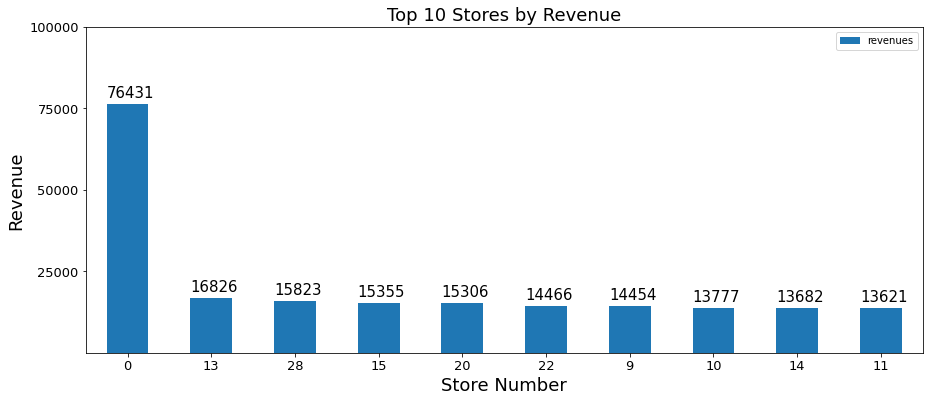

In [38]:
ax = top_shops_rev.plot(kind='bar', figsize=(15,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Top 10 Stores by Revenue", fontsize=18)
ax.set_ylabel("Revenue", fontsize=18)
ax.set_xlabel('Store Number', fontsize=18)
ax.set_yticks([25000, 50000, 75000, 100000])
plt.xticks(rotation=360)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+2000, \
            str(round(i.get_height())), fontsize=15, color='black')

<a id='4.1.2'><a/>
### 4.1.2 Store Unit Sales
[Return to Table of Contents](#back)

In [39]:
unit_sales_per_shop = performance_df.groupby('shop_id_int')['quantity'].sum().sort_values(ascending=False).to_frame()
top_shops_units = unit_sales_per_shop.nlargest(10,'quantity')

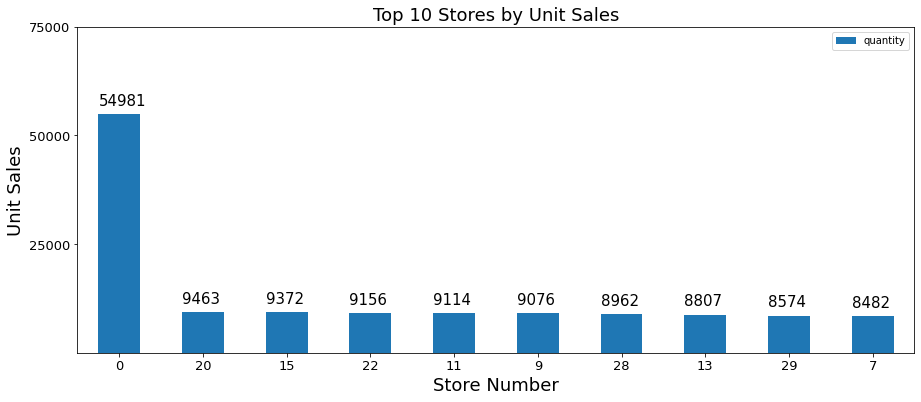

In [40]:
ax = top_shops_units.plot(kind='bar', figsize=(15,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Top 10 Stores by Unit Sales", fontsize=18)
ax.set_ylabel("Unit Sales", fontsize=18)
ax.set_xlabel('Store Number', fontsize=18)
ax.set_yticks([25000, 50000, 75000])
plt.xticks(rotation=360)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+2000, \
            str(round(i.get_height())), fontsize=15, color='black')

<a id='4.1.3'><a/>
### 4.1.3 Revenue and Unit Sales Distribution
[Return to Table of Contents](#back)

In [49]:
# filtering for top shops

unit_sales_value_list = top_shops_units.index[:]
unit_sales_boolean_series = performance_df.shop_id_int.isin(unit_sales_value_list)
unit_sales_filtered_df = performance_df[unit_sales_boolean_series]

rev_value_list = top_shops_rev.index[:]
rev_sales_boolean_series = performance_df.shop_id_int.isin(rev_value_list)
rev_sales_filtered_df = performance_df[rev_sales_boolean_series]

# limiting purchases to under $150 to remove outliers

rev_sales_under_150 = rev_sales_filtered_df[rev_sales_filtered_df['revenues'] < 150]

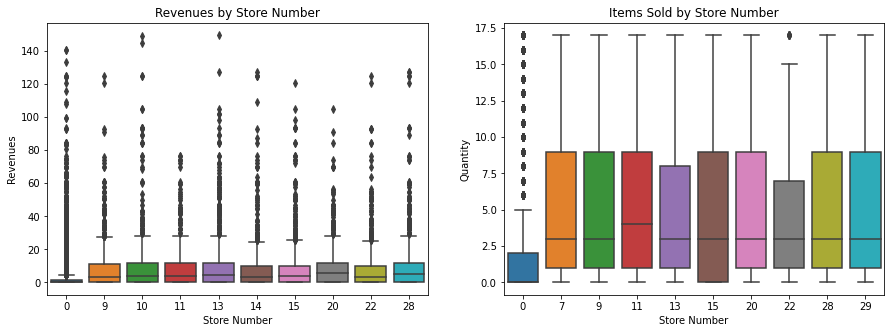

In [50]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(y="revenues", x= "shop_id_int", data=rev_sales_under_150, ax=axes[0])
axes[0].set_title('Revenues by Store Number')
axes[0].set_xlabel('Store Number')
axes[0].set_ylabel('Revenues')
sns.boxplot(y="quantity", x= "shop_id_int", data=unit_sales_filtered_df, ax=axes[1])
axes[1].set_title('Items Sold by Store Number')
axes[1].set_xlabel('Store Number')
axes[1].set_ylabel('Quantity')

plt.show()

In [51]:
(print("Store 0 average sales price is {:.2f}."
       .format(performance_df[(performance_df['revenues'] != 0) & 
                              (performance_df['shop_id_int'] == 0)]['revenues'].mean())))

Store 0 average sales price is 5.33.


In [52]:
(print("All other stores average sales price is {:.2f}."
       .format(performance_df[(performance_df['revenues'] != 0) & 
                              (performance_df['shop_id_int'] != 0)]['revenues'].mean())))

All other stores average sales price is 10.85.


Store 0 is the best performing store by revenues, which is driven by more units sold versus a higher average sales price. We will confirm this through a t-test.

<a id='4.2'><a/>
## 4.2 Customer Revenue
[Return to Table of Contents](#back)

In [88]:
loyalty_v_non = performance_df.groupby(['customer_id','loyalty_program'])['revenues'].sum().unstack(1)

In [89]:
reg_members = loyalty_v_non[0].count()
loyalty_prog_members = loyalty_v_non[1].count()

print("There are {} members who are NOT in the loyalty program.".format(reg_members))
print("There are {} members who are in the loyalty program.".format(loyalty_prog_members))

There are 1056 members who are NOT in the loyalty program.
There are 541 members who are in the loyalty program.


In [90]:
reg_members_rev = loyalty_v_non[0].sum()
loyalty_program_rev = loyalty_prog_members*time_frame_months*loyalty_prog_fee
loyalty_members_rev = loyalty_v_non[1].sum()+ loyalty_program_rev

print("Non-loyalty program members brought in {:.0f} dollars of revenue over the period.".format(reg_members_rev))
print("Loyalty program members brought in {:.0f} dollars of revenue over the period, including the $20 monthly membership fee.".format(loyalty_members_rev))

print("Loyalty program members bring in {:.0f} dollars LESS in monthly revenue.".format((reg_members_rev-loyalty_members_rev)/time_frame_months))


Non-loyalty program members brought in 343571 dollars of revenue over the period.
Loyalty program members brought in 149929 dollars of revenue over the period, including the $20 monthly membership fee.
Loyalty program members bring in 64547 dollars LESS in monthly revenue.


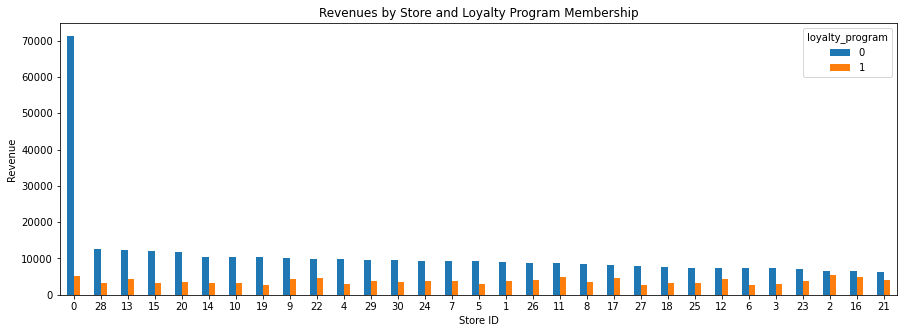

In [91]:
(performance_df.groupby(['shop_id_int','loyalty_program'])['revenues'].sum().
 unstack().sort_values(by=0,ascending=False).plot(kind='bar', figsize=(15,5), label=['Reg Member', 'Loyalty Member']))

plt.title('Revenues by Store and Loyalty Program Membership')
plt.xlabel('Store ID')
plt.ylabel('Revenue')
plt.xticks(rotation=360)

plt.show()

<a id='4.3'><a/>
## 4.3 Product Performance
[Return to Table of Contents](#back)

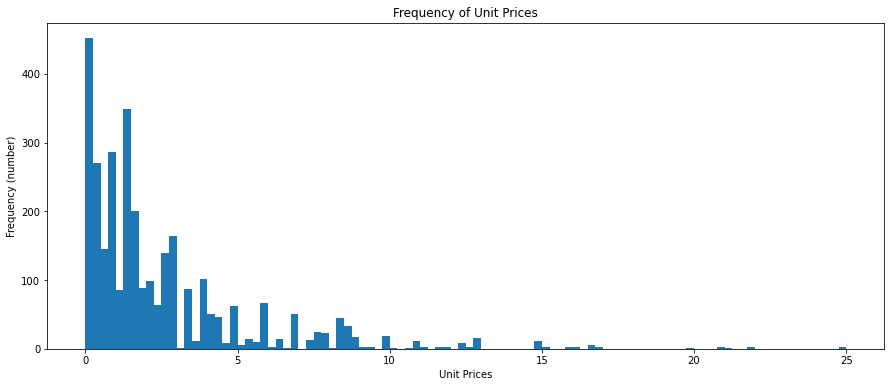

In [189]:
product_df.hist(bins=100, range=[0, 25], figsize=(15,6), grid=False)

plt.title('Frequency of Unit Prices')
plt.xlabel('Unit Prices')
plt.ylabel('Frequency (number)')

plt.show()

The products sold most frequently are under $5. 

In [94]:
# top 20 performing products

top_products = performance_df.groupby(['product_id'])['revenues'].sum().sort_values(ascending=False).head(20)

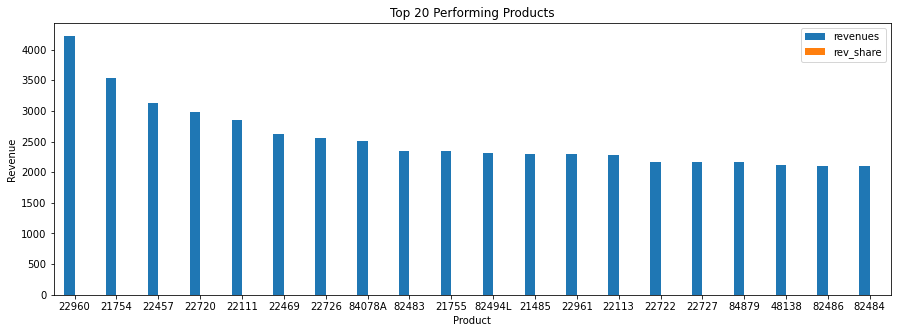

In [187]:
# plot

top_products.plot(kind='bar', figsize=(15,5))
plt.title('Top 20 Performing Products')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=360)

plt.show()

In [111]:
top_products['rev_share'] = top_products['revenues'] / total_revenues
top_products.head(10)

,revenues,rev_share
product_id,,
22960,4222.50,0.009159
21754,3542.50,0.007684
22457,3136.50,0.006803
22720,2983.50,0.006471
22111,2847.50,0.006176
22469,2621.60,0.005686
22726,2553.75,0.005539
84078A,2516.40,0.005458
82483,2351.25,0.005100


It is not the case that a few products sell much better than the rest. We can see that the top selling product makes up less than 1% of total revenues.

<a id='4.4'><a/>
## 4.4 Sales Over the Time Period
[Return to Table of Contents](#back)

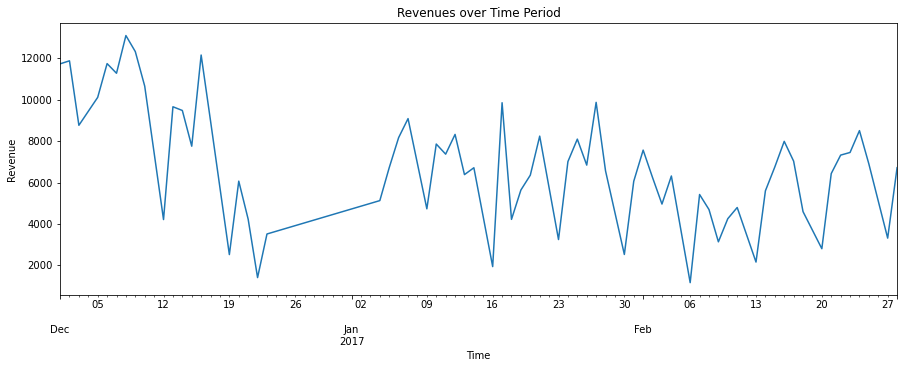

In [116]:
performance_df.groupby('purchase_day')['revenues'].sum().plot(figsize=(15,5))

plt.title('Revenues over Time Period')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.xticks(rotation=360)

plt.show()

The above graph shows us that sales we generally higher in the weeks leading up to December holidays.

<a id='5'><a/>
# 5 Hypothesis Testing
[Return to Table of Contents](#back)

For this analysis we will be performing statistical tests using t-tests:

<ul>
 <li>Test 1: Average revenue per order for Shop 0 and all other shops are the same</li>
 <li>Test 2: Average revenue per order amongst members in the loyalty program and those NOT in the loyalty program is different</li>
 </ul>

<a id='5.1'><a/>
## 5.1 Test 1
[Return to Table of Contents](#back)

<a id='5.1.1'><a/>
### 5.1.1 Assumptions Review
[Return to Table of Contents](#back)

Definitions:

<ul>
 <li>H0 (null hypothesis): average revenues per order for Shop 0 = average revenues per order for all other shops </li>
 <li>H1 (alternative hypothesis): average revenues per order for Shop 0 <> average revenues per order for all other shops </li>
 <li>Alpha: 0.05 (typical) </li>
 </ul>
 
If p_value < alpha, reject the null hypothesis. If p_value > alpha, fail to reject the null hypothesis.

In [178]:
# before testing hypothesis with T-test, we must check sample variance for homogeneity

stat, p = levene(performance_df[(performance_df['revenues'] != 0) & (performance_df['shop_id_int'] == 0)]['revenues'],performance_df[(performance_df['revenues'] != 0) & (performance_df['shop_id_int'] != 0)]['revenues'])
p

6.101715308197171e-151

The p-value (i.e. < than 0.05) suggests that the populations do NOT have equal variances.

<a id='5.1.2'><a/>
### 5.1.2 Hypothesis Test
[Return to Table of Contents](#back)

In [179]:
(st.ttest_ind(performance_df[(performance_df['revenues'] != 0) & (performance_df['shop_id_int'] == 0)]['revenues'],
              performance_df[(performance_df['revenues'] != 0) & (performance_df['shop_id_int'] != 0)]['revenues'],equal_var=False))

Ttest_indResult(statistic=-56.76188423922018, pvalue=0.0)

The p_value < 0.05 and thus we reject the null hypothesis of equal averages. There is a statistical difference between the average revenues for store 0 and all other stores, meaning that the average revenues per order are not the same, which we saw earlier in our analysis.

<a id='5.2'><a/>
## 5.2 Test 2
[Return to Table of Contents](#back)

<a id='5.2.1'><a/>
### 5.2.1 Assumptions Review
[Return to Table of Contents](#back)

Definitions:

<ul>
 <li>H0 (null hypothesis): average revenues per order for loyalty program members == average revenues per order for NON loyalty program members </li>
 <li>H1 (alternative hypothesis): average revenues per order for loyalty program members <> average revenues per order for NON loyalty program members </li>
 <li>Alpha: 0.05 (typical) </li>
 </ul>
 
If p_value < alpha, reject the null hypothesis. If p_value > alpha, fail to reject the null hypothesis.

In [180]:
# before testing hypothesis with T-test, we must check sample variance for homogeneity

stat, p = levene(performance_df[(performance_df['revenues'] != 0) & (performance_df['loyalty_program'] == 1)]['revenues'],performance_df[(performance_df['revenues'] != 0) & (performance_df['loyalty_program'] == 0)]['revenues'])
p

0.40319267863325003

The p-value (i.e. > than 0.05) suggests that the populations do have equal variances.

<a id='5.2.2'><a/>
### 5.2.2 Hypothesis Test
[Return to Table of Contents](#back)

In [181]:
performance_df.sample()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,shop_id_int,purchase_day,purchase_month,unit_price,revenues
657,540352,22372,0,2017-01-06 14:27:00,0,0,Shop 0,0,2017-01-06,2017-01,0.0,0.0


In [182]:
(st.ttest_ind(performance_df[(performance_df['revenues'] != 0) & (performance_df['loyalty_program'] == 1)]['revenues'],
              performance_df[(performance_df['revenues'] != 0) & (performance_df['loyalty_program'] == 0)]['revenues']))

Ttest_indResult(statistic=2.2123857227161077, pvalue=0.026944546971396265)

The p_value > 0.05 and thus we fail to reject the null hypothesis of equal averages. There may not be a statistical difference between the average revenues for loyalty members and non loyalty program members.

<a id='6'><a/>
# 6 General Conclusions
[Return to Table of Contents](#back)

**Data Processing**

We were provided with two files for this analysis. In the retail dataset that we were provided, 105,335 purchases were made in 30 stores. There was a significant amount of pre-processing that needed to be done including filling in 30,000 missing values in the series 'CustomerID', dropping 1,033 duplicate, formatting and improving clarity of column names, dropping negative values in the series 'Quantity'. In the product dataset there are over 3,000 different products with unit costs ranging from USD 0-175. The dataset was relatively clean. Once completed the files were merged.

**Exploratory Data Analysis**

Store 0, perhaps the flagship store, is the top performing store by revenue and by units sold. Store 0 accounts for 16.6% of total revenue, while the next top 9 stores account for 3-3.5% each. Store 0 average sales price is USD 5.33 vs 10.85. A t-test confirmed a statistical difference between the average revenues for store 0 and all other stores. The majority of unit prices are below $10 with no bucket of products contributing disproportionately to revenue. The top-performing product, item 22960 contributes < 1 percent to total revenues. 

There are 541 members in the loyalty program and 1,056 non-loyalty program members. Non-Loyalty program members brought in 343,571 dollars of revenue over the period. Loyalty program members brought in 149,929 dollars of revenue over the period, including the $20 monthly membership fee. Loyalty program members bring in 64,547 dollars LESS in monthly revenue. The vast majority of revenues are derived from non-loyalty versus loyalty members. A t-test was unable to reject the hypothesis that there is a statistical difference between the average revenues for loyalty and non loyalty program members. Sales we generally higher in the weeks leading up to December holidays.

**Recommendations to Management**

Our analysis showed that we do not need to focus on selling more of particular products (as revenues are distributed broadly across the product catalog) or increasing membership in our loyalty program (Loyalty program members bring in 64,547 dollars LESS in monthly revenue). We should instead focus on selling high volumes of lower cost items, which is Store O's winning strategy. 

For further analysis, we recommend examining the costs associated with the loyalty program as it might be worth cancelling.